### ***Importing Necessary Libraries***

> Add blockquote



---



In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### ***Data Collection***

---



In [ ]:
df = pd.read_csv('/content/Literacy_Rate-Ministry_of_Finance_1.csv')
df.head()

,State/ UTs,1951,1961,1971,1981,1991,2001,2011
0,Andaman and Nicobar Islands,30.30,40.07,51.15,63.19,73.02,81.30,86.6
1,Andhra Pradesh,NaN,21.19,24.57,35.66,44.08,60.47,67.0
2,Arunachal Pradesh,NaN,7.13,11.29,25.55,41.59,54.34,65.4
3,Assam,18.53,32.95,33.94,NaN,52.89,63.25,72.2
4,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.8


### ***Understanding the Data***

---



**State/ UTs :** Column containg names of different States and Union Territories of India

**1951 :** It gives us the Literacy Rate of that State or Union Territory in the year 1951.

**1961 :** It gives us the Literacy Rate of that State or Union Territory in the year 1961.

**1971 :** It gives us the Literacy Rate of that State or Union Territory in the year 1971.

**1981 :** It gives us the Literacy Rate of that State or Union Territory in the year 1981.

**1991 :** It gives us the Literacy Rate of that State or Union Territory in the year 1991.

**2001 :** It gives us the Literacy Rate of that State or Union Territory in the year 2001.

**2011 :** It gives us the Literacy Rate of that State or Union Territory in the year 2011.

In [ ]:
df.columns

Index(['State/ UTs', '1951', '1961', '1971', '1981', '1991', '2001', '2011'], dtype='object')

In [ ]:
df.shape

(35, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State/ UTs  35 non-null     object 
 1   1951        19 non-null     float64
 2   1961        28 non-null     float64
 3   1971        33 non-null     float64
 4   1981        32 non-null     float64
 5   1991        34 non-null     float64
 6   2001        35 non-null     float64
 7   2011        35 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.3+ KB


In [ ]:
df.describe()

,1951,1961,1971,1981,1991,2001,2011
count,19.000000,28.000000,33.000000,32.000000,34.000000,35.000000,35.000000
mean,19.343684,29.115357,36.225455,47.243125,58.883824,69.562286,77.845714
std,9.706824,12.380855,15.271119,14.845775,14.238478,10.770450,8.582758
min,8.500000,7.130000,11.290000,25.550000,37.490000,47.000000,61.800000
25%,12.750000,21.072500,24.080000,33.942500,45.775000,62.820000,71.250000
50%,15.800000,27.035000,33.780000,45.490000,58.130000,68.810000,76.900000
75%,24.045000,35.567500,45.770000,57.900000,69.617500,77.530000,85.900000
max,47.180000,61.950000,70.430000,78.850000,89.810000,90.860000,94.000000


### ***Handeling Missing Values***

---



In [ ]:
df.isnull().sum()

State/ UTs     0
1951          16
1961           7
1971           2
1981           3
1991           1
2001           0
2011           0
dtype: int64

<Axes: >

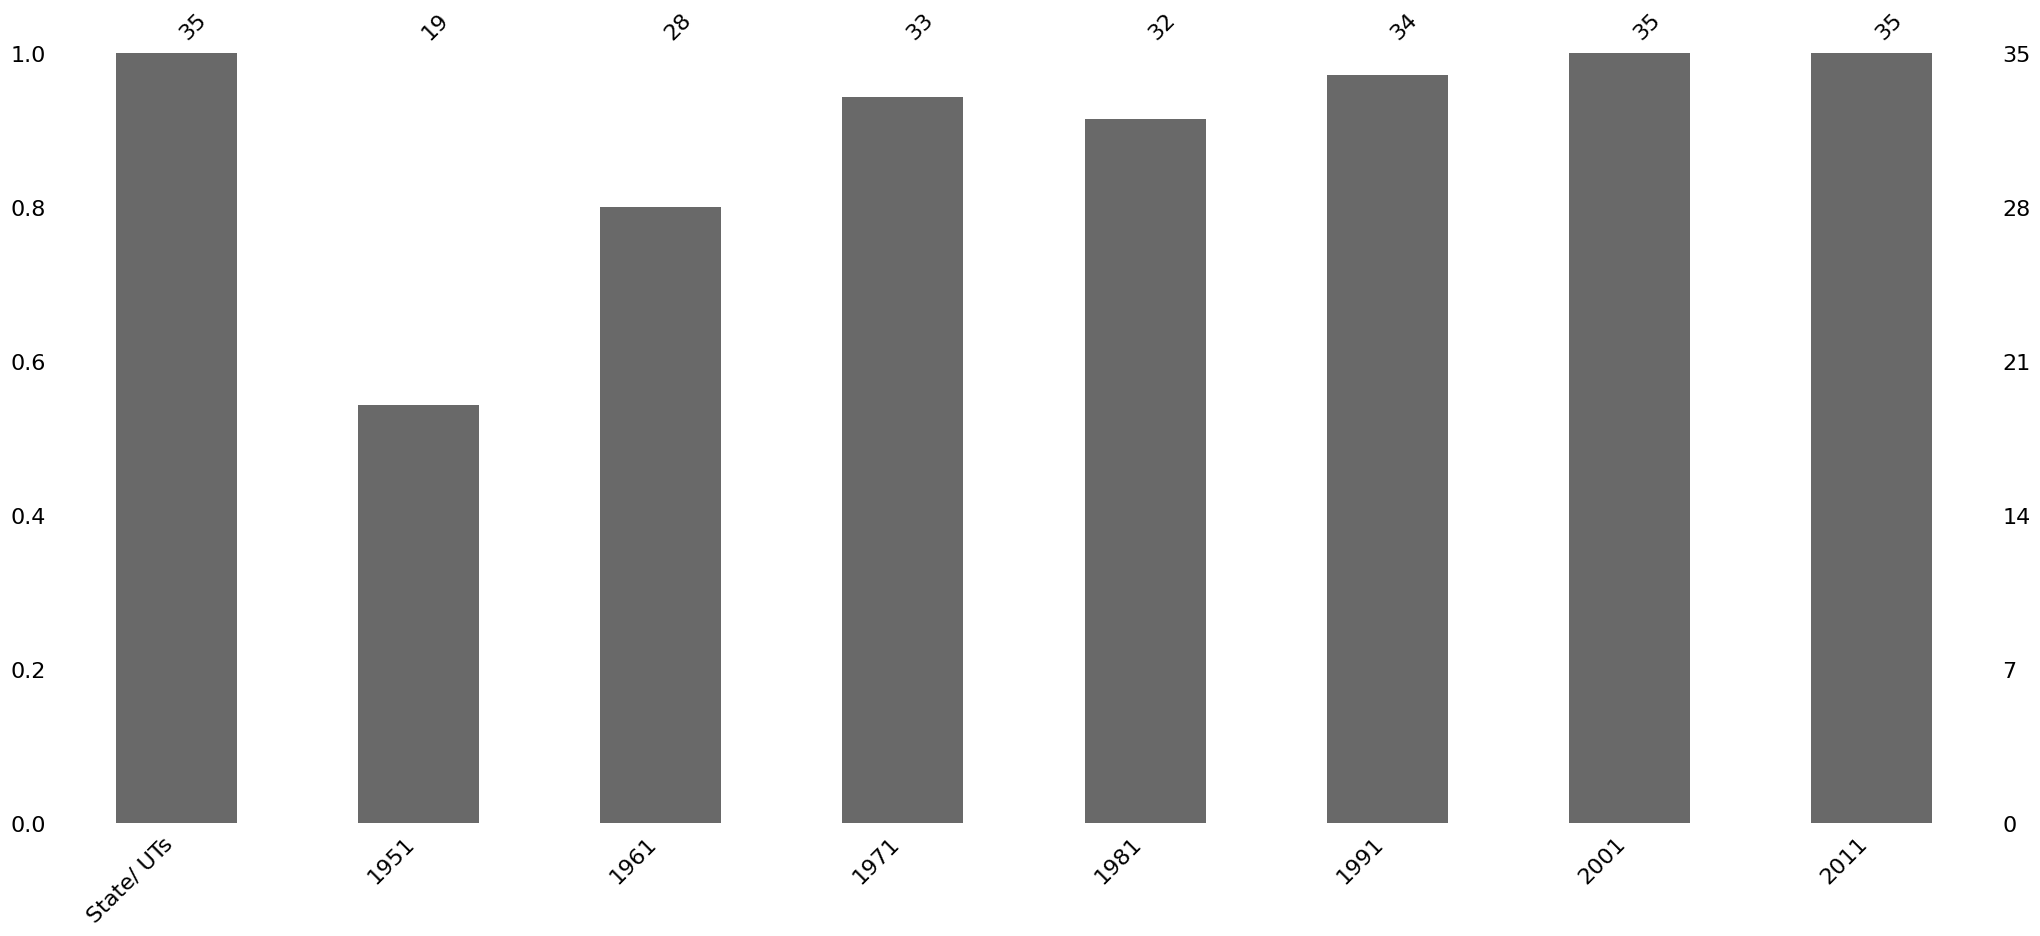

In [ ]:
msno.bar(df)

<Axes: >

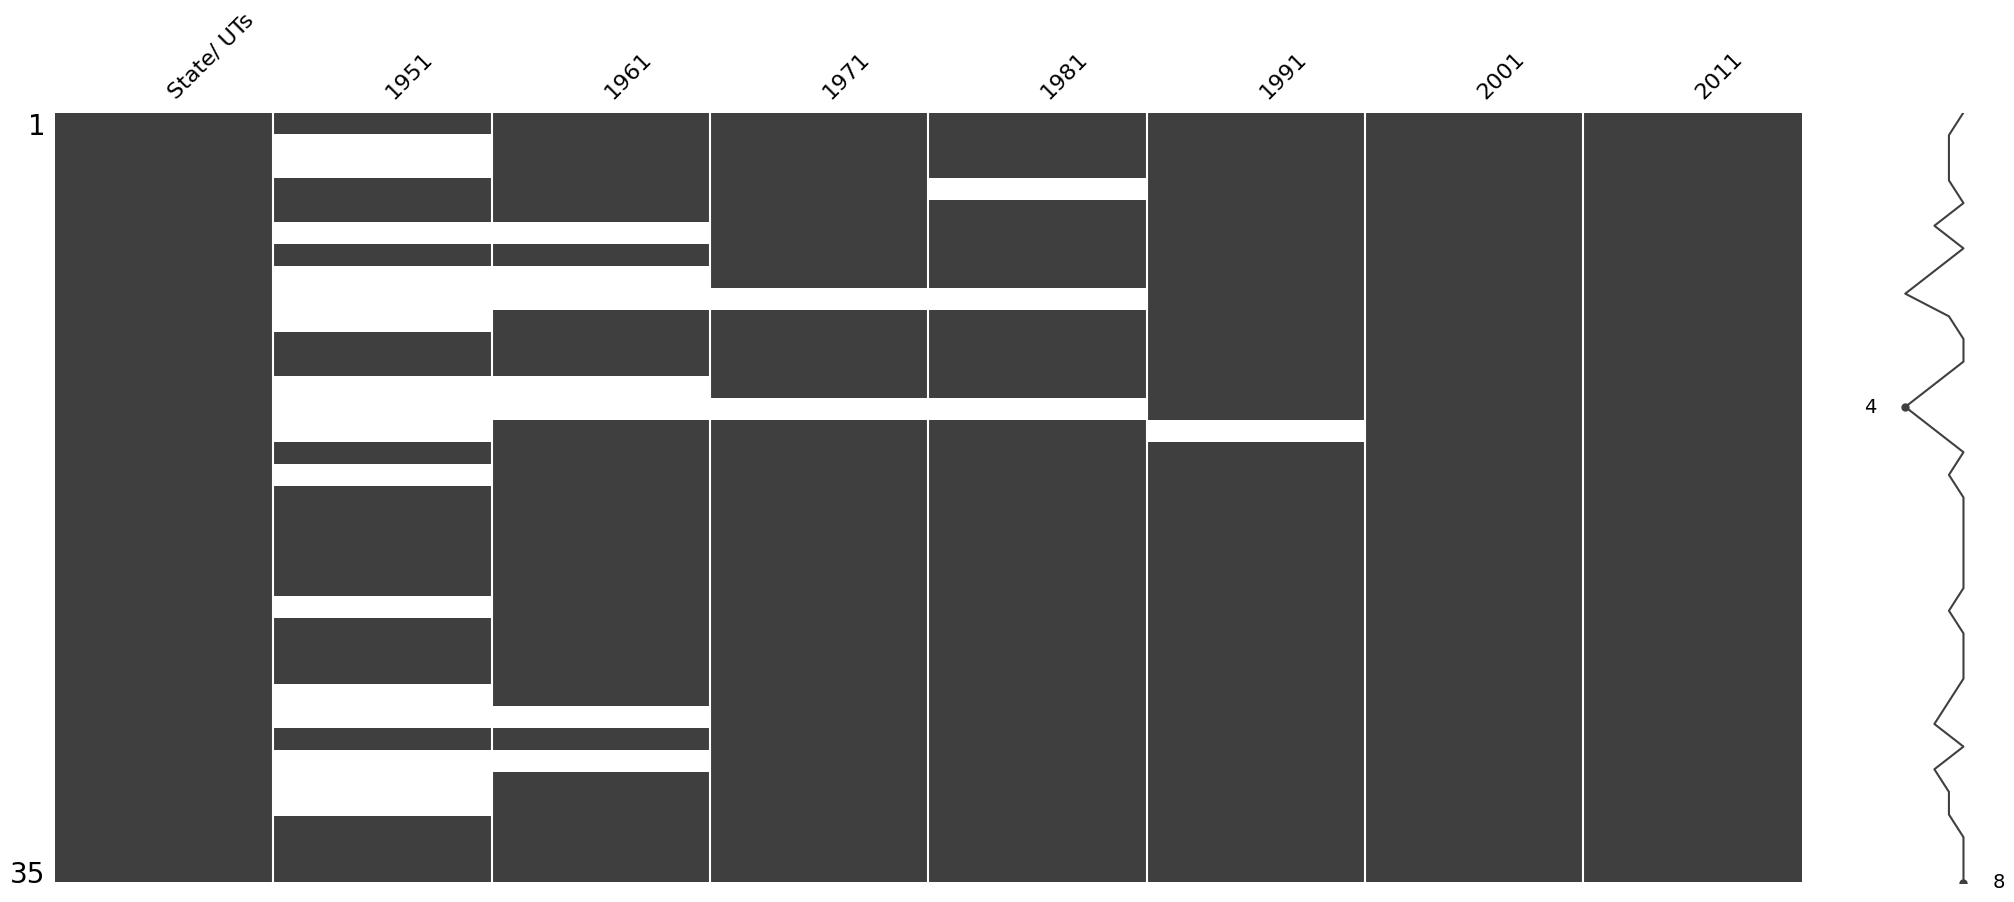

In [ ]:
msno.matrix(df)

The missing values that exists above are actually due to other factors like the State or Union Territory not existing atleast until that year. Hence to show that we use Simple Imputer to make the values zero.

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value = 0)
num_cols = df.select_dtypes(include=['float64'])
for cols in num_cols:
  df[cols] = imputer.fit_transform(df[[cols]])

In [ ]:
df.isnull().sum()

State/ UTs    0
1951          0
1961          0
1971          0
1981          0
1991          0
2001          0
2011          0
dtype: int64

### ***Data Visualisation***

---



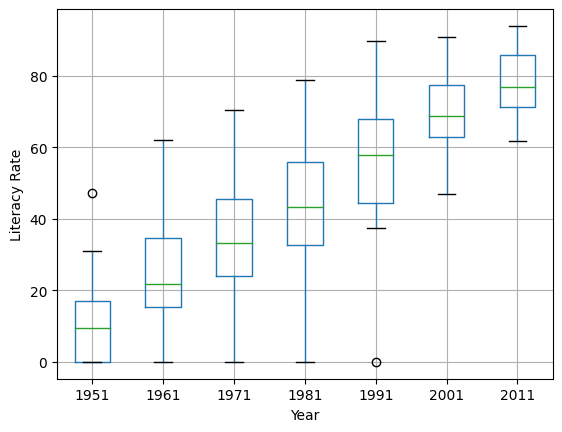

In [ ]:
df_years = df.drop(columns=['State/ UTs'])
df_years.boxplot()
plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



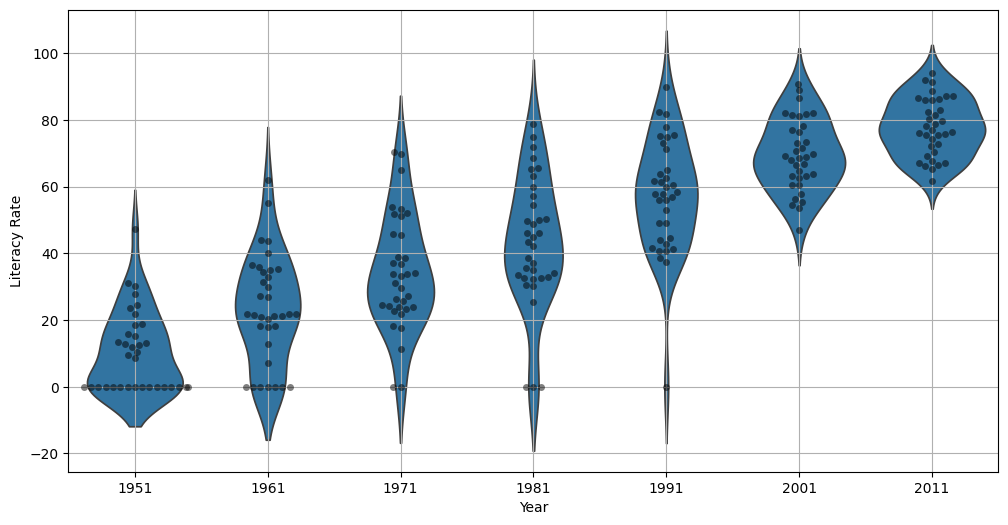

In [ ]:
df_melted = df.melt(id_vars='State/ UTs', var_name='Year', value_name='Literacy Rate')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Literacy Rate', data=df_melted, inner=None)
sns.swarmplot(x='Year', y='Literacy Rate', data=df_melted, color='k', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.grid(True)
plt.show()

### ***Analysing Trend for each State/Union Territory***

---



In [ ]:
traces = []
for state in df['State/ UTs']:
    trace = go.Scatter(
        x=df.columns[1:],
        y=df.loc[df['State/ UTs'] == state].values.flatten()[1:],
        mode='lines+markers',
        name=state
    )
    traces.append(trace)

layout = go.Layout(
    title='Literacy Rate Over the Years for All States',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Literacy Rate'),
    hovermode='closest'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

### ***Bar Plots for each year***

---



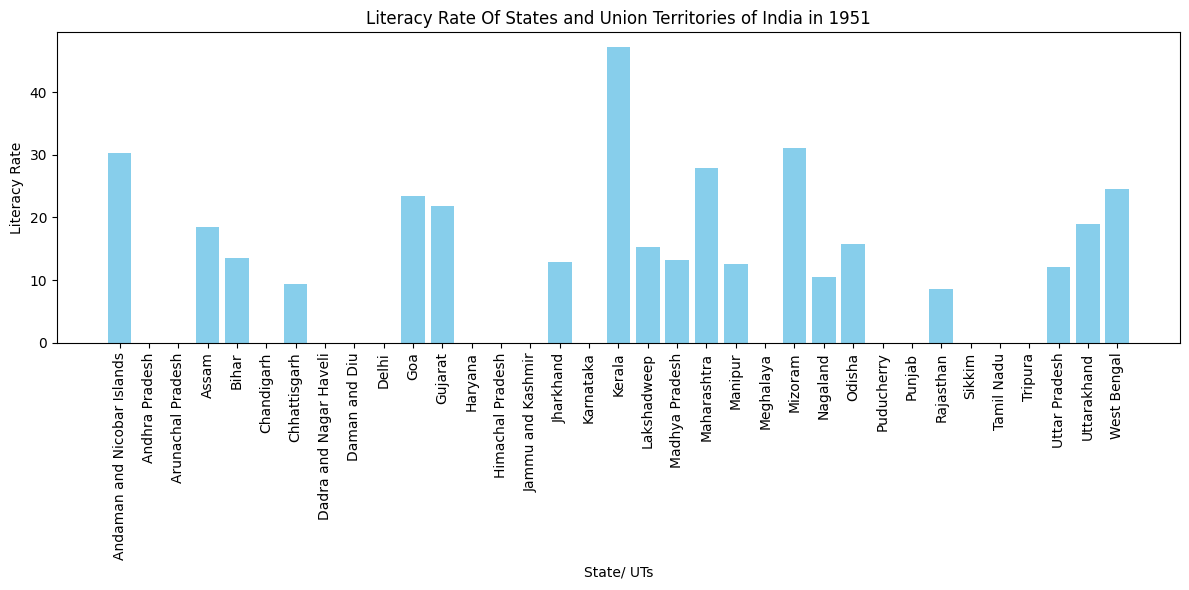

In [ ]:
yr_1951 = df[['State/ UTs', '1951']]

plt.figure(figsize=(12, 6))
plt.bar(yr_1951['State/ UTs'], yr_1951['1951'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 1951')
plt.tight_layout()
plt.show()

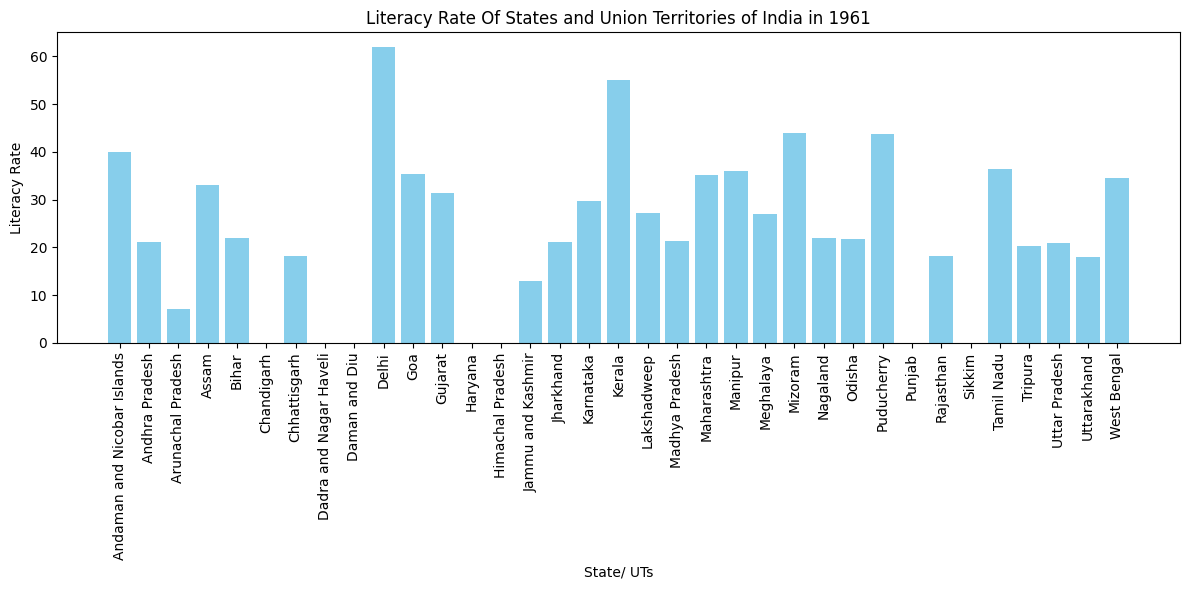

In [ ]:
yr_1961 = df[['State/ UTs', '1961']]

plt.figure(figsize=(12, 6))
plt.bar(yr_1961['State/ UTs'], yr_1961['1961'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 1961')
plt.tight_layout()
plt.show()

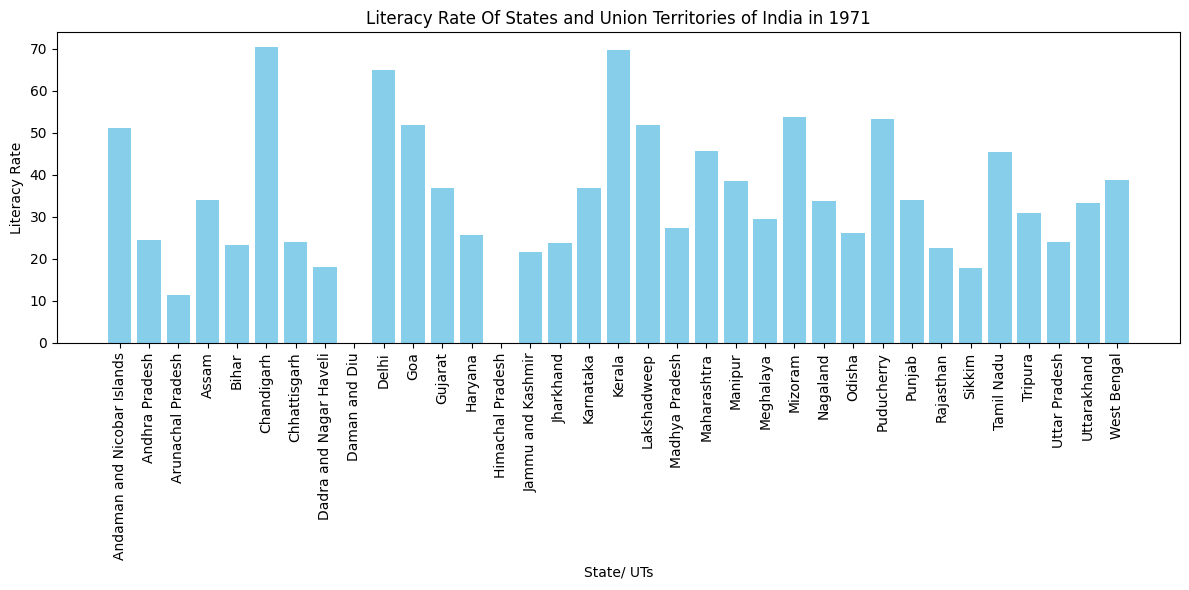

In [ ]:
yr_1971 = df[['State/ UTs', '1971']]

plt.figure(figsize=(12, 6))
plt.bar(yr_1971['State/ UTs'], yr_1971['1971'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 1971')
plt.tight_layout()
plt.show()

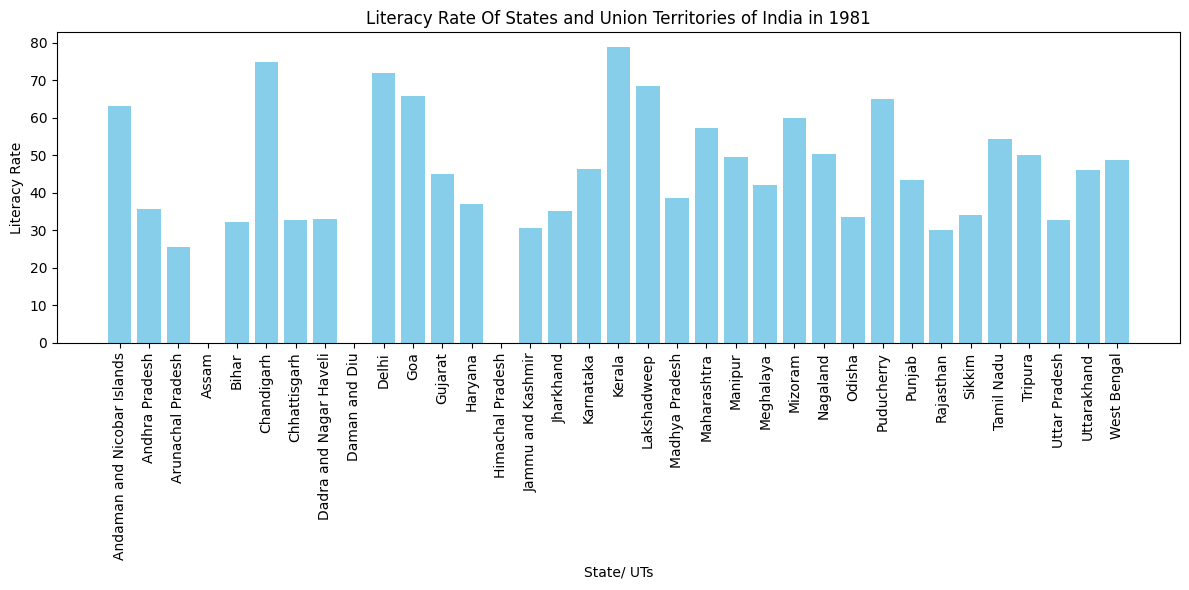

In [ ]:
yr_1981 = df[['State/ UTs', '1981']]

plt.figure(figsize=(12, 6))
plt.bar(yr_1981['State/ UTs'], yr_1981['1981'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 1981')
plt.tight_layout()
plt.show()

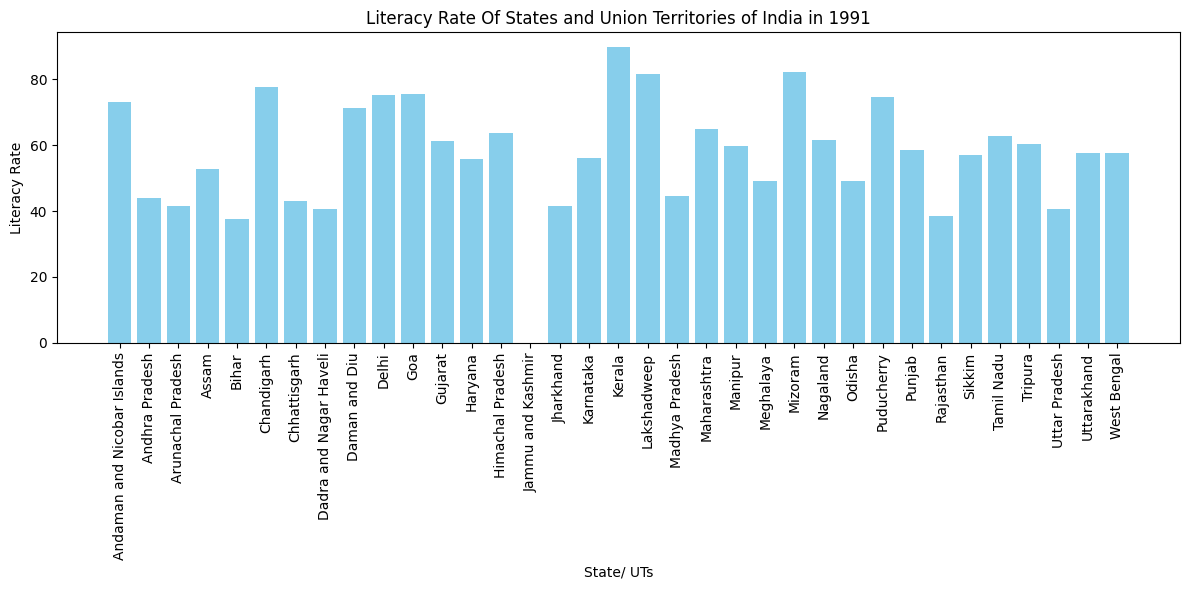

In [ ]:
yr_1991 = df[['State/ UTs', '1991']]

plt.figure(figsize=(12, 6))
plt.bar(yr_1991['State/ UTs'], yr_1991['1991'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 1991')
plt.tight_layout()
plt.show()

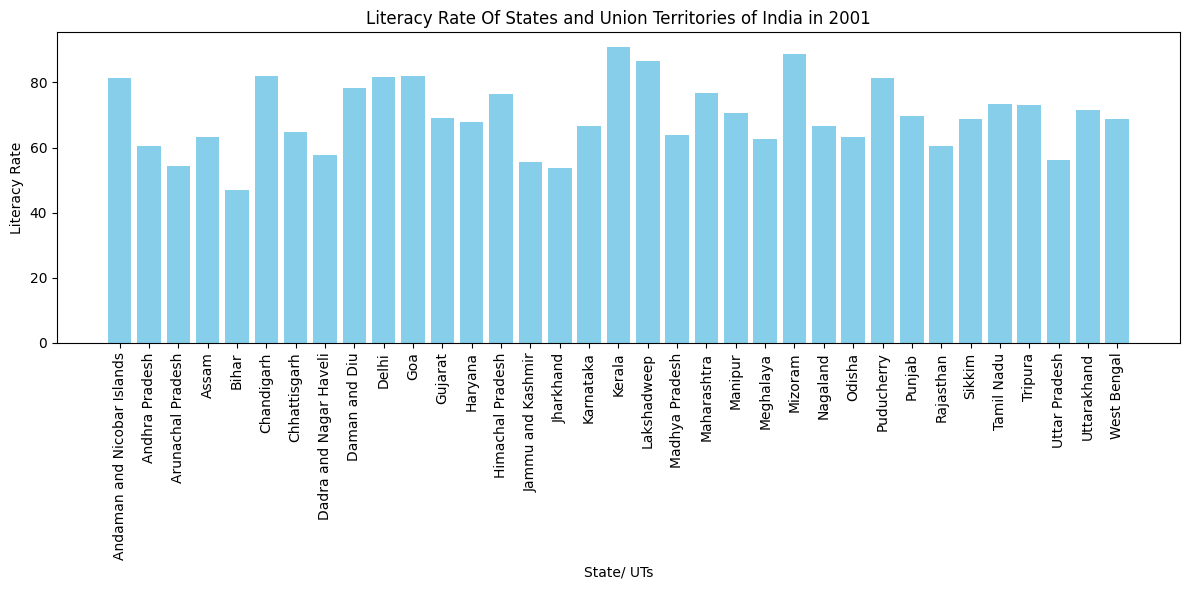

In [ ]:
yr_2001 = df[['State/ UTs', '2001']]

plt.figure(figsize=(12, 6))
plt.bar(yr_2001['State/ UTs'], yr_2001['2001'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 2001')
plt.tight_layout()
plt.show()

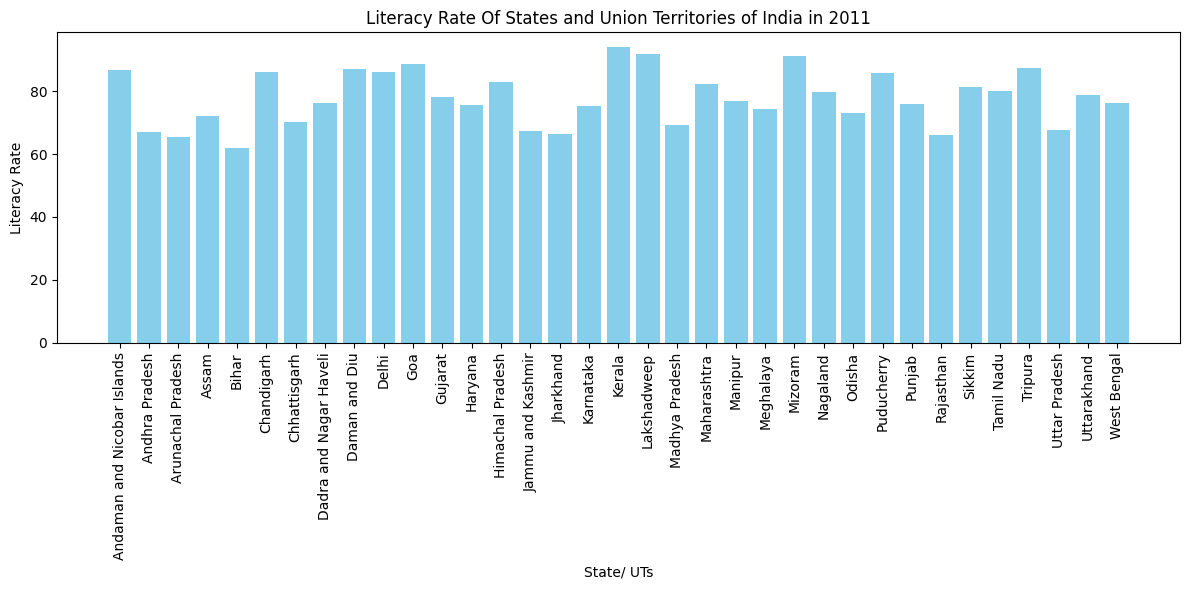

In [ ]:
yr_2011 = df[['State/ UTs', '2011']]

plt.figure(figsize=(12, 6))
plt.bar(yr_2011['State/ UTs'], yr_2011['2011'], color='skyblue')
plt.xlabel('State/ UTs')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.title('Literacy Rate Of States and Union Territories of India in 2011')
plt.tight_layout()
plt.show()

### ***Analysis Based on Zones***

---



In [ ]:
North = ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Uttar Pradesh', 'Haryana', 'Chandigarh', 'Delhi']
West = ['Rajasthan', 'Gujarat', 'Maharashtra', 'Goa', 'Dadra and Nagar Haveli', 'Daman and Diu']
South = ['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Puducherry', 'Lakshadweep']
East = ['West Bengal', 'Jharkhand', 'Bihar', 'Odisha', 'Assam', 'Sikkim', 'Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya']

In [ ]:
for year in df.columns[1:]:
  max_lit_state = ''
  max_lit_rate = 0
  for state in North:
      literacy_rate = df[df['State/ UTs'] == state][year].values[0]
      if literacy_rate > max_lit_rate:
          max_lit_rate = literacy_rate
          max_lit_state = state
  print(f"In {year}, {max_lit_state} had the highest literacy rate in the North zone with {max_lit_rate:.2f}%")

In 1951, Uttarakhand had the highest literacy rate in the North zone with 18.93%
In 1961, Delhi had the highest literacy rate in the North zone with 61.95%
In 1971, Chandigarh had the highest literacy rate in the North zone with 70.43%
In 1981, Chandigarh had the highest literacy rate in the North zone with 74.80%
In 1991, Chandigarh had the highest literacy rate in the North zone with 77.81%
In 2001, Chandigarh had the highest literacy rate in the North zone with 81.94%
In 2011, Delhi had the highest literacy rate in the North zone with 86.20%


In [ ]:
for year in df.columns[1:]:
  max_lit_state = ''
  max_lit_rate = 0
  for state in West:
      literacy_rate = df[df['State/ UTs'] == state][year].values[0]
      if literacy_rate > max_lit_rate:
          max_lit_rate = literacy_rate
          max_lit_state = state
  print(f"In {year}, {max_lit_state} had the highest literacy rate in the West zone with {max_lit_rate:.2f}%")

In 1951, Maharashtra had the highest literacy rate in the West zone with 27.91%
In 1961, Goa had the highest literacy rate in the West zone with 35.41%
In 1971, Goa had the highest literacy rate in the West zone with 51.96%
In 1981, Goa had the highest literacy rate in the West zone with 65.71%
In 1991, Goa had the highest literacy rate in the West zone with 75.51%
In 2001, Goa had the highest literacy rate in the West zone with 82.01%
In 2011, Goa had the highest literacy rate in the West zone with 88.70%


In [ ]:
for year in df.columns[1:]:
  max_lit_state = ''
  max_lit_rate = 0
  for state in South:
    state_data = df[df['State/ UTs'] == state]
    if not state_data.empty:
      literacy_rate = state_data[year].values[0]
      if literacy_rate > max_lit_rate:
        max_lit_rate = literacy_rate
        max_lit_state = state
  print(f"In {year}, {max_lit_state} had the highest literacy rate in the South zone with {max_lit_rate:.2f}%")

In 1951, Kerala had the highest literacy rate in the South zone with 47.18%
In 1961, Kerala had the highest literacy rate in the South zone with 55.08%
In 1971, Kerala had the highest literacy rate in the South zone with 69.75%
In 1981, Kerala had the highest literacy rate in the South zone with 78.85%
In 1991, Kerala had the highest literacy rate in the South zone with 89.81%
In 2001, Kerala had the highest literacy rate in the South zone with 90.86%
In 2011, Kerala had the highest literacy rate in the South zone with 94.00%


In [ ]:
for year in df.columns[1:]:
  max_lit_state = ''
  max_lit_rate = 0
  for state in East:
      literacy_rate = df[df['State/ UTs'] == state][year].values[0]
      if literacy_rate > max_lit_rate:
          max_lit_rate = literacy_rate
          max_lit_state = state
  print(f"In {year}, {max_lit_state} had the highest literacy rate in the East zone with {max_lit_rate:.2f}%")

In 1951, Mizoram had the highest literacy rate in the East zone with 31.14%
In 1961, Mizoram had the highest literacy rate in the East zone with 44.01%
In 1971, Mizoram had the highest literacy rate in the East zone with 53.80%
In 1981, Andaman and Nicobar Islands had the highest literacy rate in the East zone with 63.19%
In 1991, Mizoram had the highest literacy rate in the East zone with 82.26%
In 2001, Mizoram had the highest literacy rate in the East zone with 88.80%
In 2011, Mizoram had the highest literacy rate in the East zone with 91.30%


### ***State with highest percentage increase***

---



The percentage improvement formula is given by:

$$
\text{Percentage Improvement} = \left( \frac{{\text{Literacy Rate in Current Year} - \text{Literacy Rate in Previous Year}}}{{\text{Literacy Rate in Previous Year}}} \right) \times 100
$$

In [ ]:
start_years = ['1951', '1961', '1971', '1981', '1991', '2001']
end_years = ['1961', '1971', '1981', '1991', '2001', '2011']

most_improved_states = {year: '' for year in end_years}
most_improved_percentage = {year: -float('inf') for year in end_years}
most_improved_lit_start = {year: 0 for year in start_years}
most_improved_lit_end = {year: 0 for year in end_years}

for state in df['State/ UTs']:
    for i in range(len(start_years)):
        lit_rate_start = df[df['State/ UTs'] == state][start_years[i]].values[0]
        lit_rate_end = df[df['State/ UTs'] == state][end_years[i]].values[0]
        if lit_rate_start != 0:
            percentage_increase = ((lit_rate_end - lit_rate_start) / lit_rate_start) * 100
            if percentage_increase > most_improved_percentage[end_years[i]]:
                most_improved_states[end_years[i]] = state
                most_improved_percentage[end_years[i]] = percentage_increase
                most_improved_lit_start[start_years[i]] = lit_rate_start
                most_improved_lit_end[end_years[i]] = lit_rate_end

for i in range(len(start_years)):
    print(f"{most_improved_states[end_years[i]]} ({start_years[i]}-{end_years[i]}):\n"
          f"Literacy Rate in {start_years[i]} - {most_improved_lit_start[start_years[i]]:.2f}%\n"
          f"Literacy Rate in {end_years[i]} - {most_improved_lit_end[end_years[i]]:.2f}%\n"
          f"Percentage increase - {most_improved_percentage[end_years[i]]:.2f}%")
    print('-'*100)

Manipur (1951-1961):
Literacy Rate in 1951 - 12.57%
Literacy Rate in 1961 - 36.04%
Percentage increase - 186.71%
----------------------------------------------------------------------------------------------------
Lakshadweep (1961-1971):
Literacy Rate in 1961 - 27.15%
Literacy Rate in 1971 - 51.76%
Percentage increase - 90.64%
----------------------------------------------------------------------------------------------------
Arunachal Pradesh (1971-1981):
Literacy Rate in 1971 - 11.29%
Literacy Rate in 1981 - 25.55%
Percentage increase - 126.31%
----------------------------------------------------------------------------------------------------
Sikkim (1981-1991):
Literacy Rate in 1981 - 34.05%
Literacy Rate in 1991 - 56.94%
Percentage increase - 67.22%
----------------------------------------------------------------------------------------------------
Rajasthan (1991-2001):
Literacy Rate in 1991 - 38.55%
Literacy Rate in 2001 - 60.41%
Percentage increase - 56.71%
-------------------

### ***Feature Engineering***

---



In [ ]:
ut = [
    "Andaman and Nicobar Islands",
    "Chandigarh",
    "Dadra and Nagar Haveli",
    "Daman and Diu",
    "Delhi",
    "Lakshadweep",
    "Puducherry"
]

df['Category'] = df['State/ UTs'].apply(lambda x: 'Union Territory' if x in ut else 'State')

In [ ]:
df.head()

,State/ UTs,1951,1961,1971,1981,1991,2001,2011,Category
0,Andaman and Nicobar Islands,30.30,40.07,51.15,63.19,73.02,81.30,86.6,Union Territory
1,Andhra Pradesh,0.00,21.19,24.57,35.66,44.08,60.47,67.0,State
2,Arunachal Pradesh,0.00,7.13,11.29,25.55,41.59,54.34,65.4,State
3,Assam,18.53,32.95,33.94,0.00,52.89,63.25,72.2,State
4,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.8,State


In [ ]:
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])

### ***Prediction***

---



In [ ]:
X = df[['1951', '1961', '1971', '1981', '1991', '2001', 'Category_Encoded']]
y = df['2011']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'fit_intercept': [True, False]}

lr = LinearRegression()

lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
lr_cv.fit(X_train, y_train)

best_params = lr_cv.best_params_
best_lr = lr_cv.best_estimator_

lr_preds = best_lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

results = pd.DataFrame({'Original': y_test, 'Predicted': lr_preds})

print("Linear Regression :")
print("Best Parameters:", best_params)
print("RMSE:", lr_rmse)
print("\nOriginal and Predicted Values:")
print(results)

Linear Regression :
Best Parameters: {'fit_intercept': True}
RMSE: 2.6595957165506454

Original and Predicted Values:
    Original  Predicted
26      85.8  88.050450
13      82.8  83.565017
24      79.6  75.927855
21      76.9  78.296299
15      66.4  65.953722
29      81.4  77.864093
19      69.3  73.265887


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'polynomialfeatures__degree': [1, 2, 3]}

poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

poly_cv = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_cv.fit(X_train, y_train)

best_params = poly_cv.best_params_
best_poly_reg = poly_cv.best_estimator_

y_pred = best_poly_reg.predict(X_test)

pr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

results = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})

print("Polynomial Regression :")
print("Best Parameters:", best_params)
print("RMSE:", pr_rmse)
print("\nResults:")
print(results)

Polynomial Regression :
Best Parameters: {'polynomialfeatures__degree': 1}
RMSE: 2.659595716550642

Results:
    Original  Predicted
26      85.8  88.050450
13      82.8  83.565017
24      79.6  75.927855
21      76.9  78.296299
15      66.4  65.953722
29      81.4  77.864093
19      69.3  73.265887


In [ ]:
from sklearn.linear_model import Ridge, Lasso
def ridge_regression(X, y, alpha):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  predictions = ridge.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  return rmse

def lasso_regression(X, y, alpha):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  predictions = lasso.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  return rmse

In [ ]:
print('Linear Regression :', lr_rmse)
print('Polynomial Regression :', pr_rmse)
print('Ridge Regression :', ridge_regression(X, y, 0.1))
print('Lasso Regression :', lasso_regression(X, y, 0.1))

Linear Regression : 2.6595957165506454
Polynomial Regression : 2.659595716550642
Ridge Regression : 1.3267730101195168
Lasso Regression : 2.3683329859916578


#Conclusion

In this notebook, we analyzed the literacy rate trends in India across multiple decades and built predictive models to estimate the 2011 literacy rate based on historical data. We experimented with different regression techniques, including:

- **Linear Regression**
- **Polynomial Regression**
- **Ridge Regression**
- **Lasso Regression**

Each model was evaluated using RMSE (Root Mean Squared Error) to compare performance. These results help us understand the historical influence of literacy trends and how well they can predict future literacy rates. This analysis can be extended further by incorporating more socio-economic factors to improve prediction accuracy and derive deeper insights.

*The models provide a good baseline for forecasting literacy growth and support informed decision-making for policy and planning.*